<a href="https://colab.research.google.com/github/joyinning/nlp_genai_study/blob/main/NLP_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

### News API

Resource: https://github.com/mattlisiv/newsapi-python

In [ ]:
%pip install newsapi-python

In [ ]:
import requests

api_key = ""
companies = {
    'Apple Inc.': 'AAPL',
    'S&P 500 SPDR': 'SPY',
    'Google Class A': 'GOOGL',
    'Google Class C': 'GOOG',
    'Facebook': 'META',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Netflix': 'NFLX',
    'MFA Financial': 'MFA',
    'Carnival Corporation': 'CCL',
    'Royal Caribbean Cruises': 'RCL',
    'Norwegian Cruise Line Holdings': 'NCLH',
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Dogecoin': 'DOGE-USD'
}

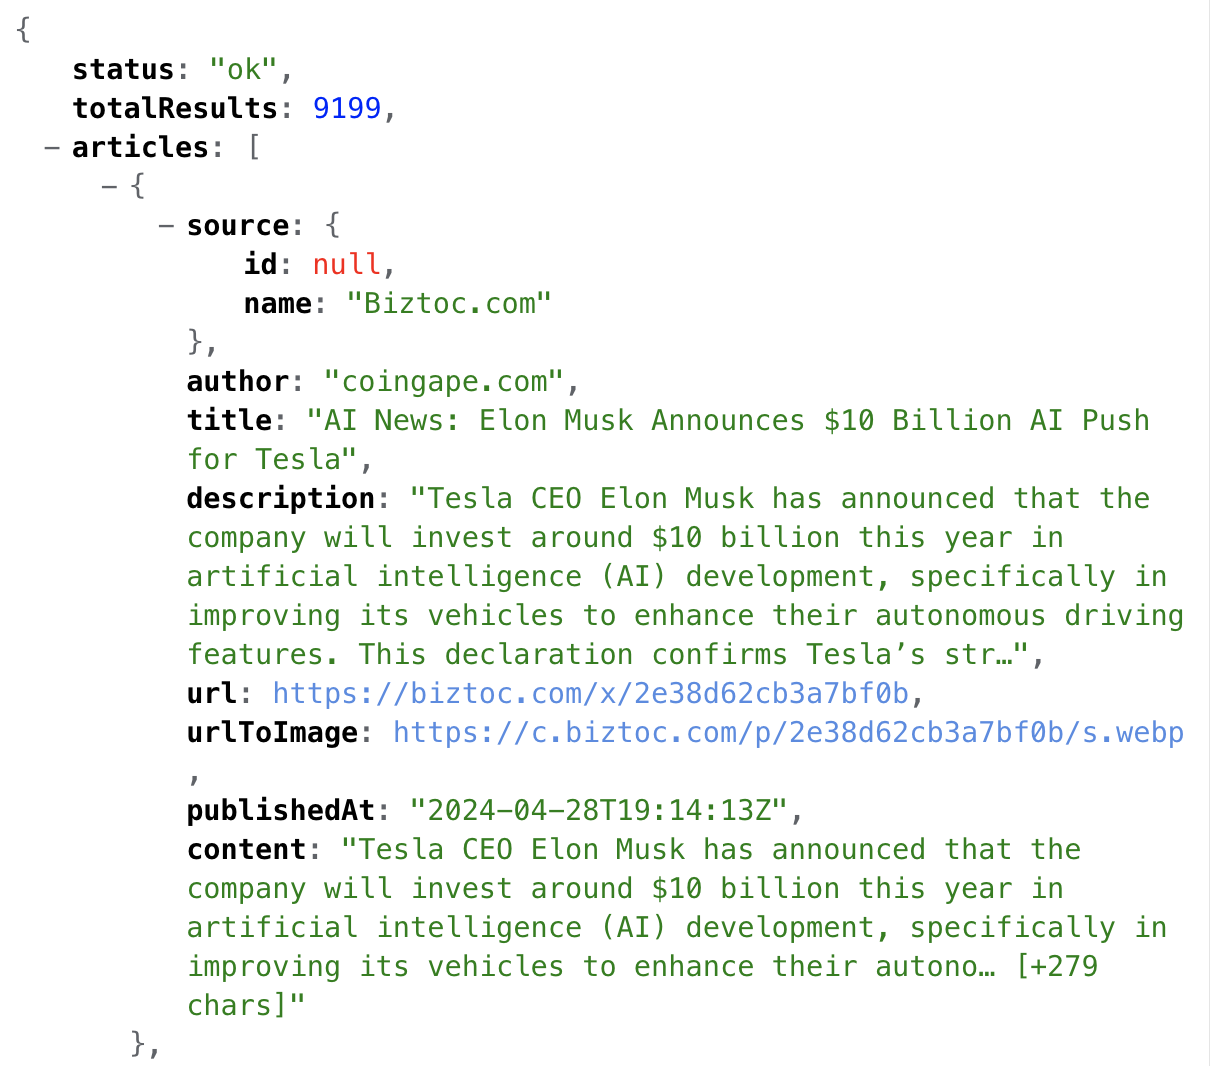

In [ ]:
from datetime import datetime

def get_news(ticker):
    url = f'https://newsapi.org/v2/everything?q={ticker}&language=en&apiKey={api_key}'
    response = requests.get(url)
    data = response.json()
    articles = []
    for article in data['articles']:
        title = article['title']
        date_iso = article['publishedAt']
        date_obj = datetime.fromisoformat(date_iso[:-1])
        date_formatted = date_obj.strftime('%Y-%m-%d')

        if date_formatted >= '2024-03-25' and date_formatted <= '2024-04-26':
            articles.append({'Title': title, 'Date': date_formatted})

        if len(articles) >= 2000:
            break
    return articles

In [ ]:
result = []
count = 0

for company, ticker in companies.items():
    if count >= 2000:
        break
    print(f"News for {company} ({ticker}):")
    try:
        articles = get_news(ticker)
        for article in articles:
            if count >= 2000:
                break
            result.append({"Ticker": ticker, "Title": article['Title'], "Date": article['Date']})
            count += 1
    except Exception as e:
        print(f"Failed to fetch news for {company}: {str(e)}")

News for Apple Inc. (AAPL):
News for S&P 500 SPDR (SPY):
News for Google Class A (GOOGL):
News for Google Class C (GOOG):
News for Facebook (META):
News for Microsoft (MSFT):
News for Amazon (AMZN):
News for Netflix (NFLX):
News for MFA Financial (MFA):
News for Carnival Corporation (CCL):
News for Royal Caribbean Cruises (RCL):
News for Norwegian Cruise Line Holdings (NCLH):
News for Bitcoin (BTC-USD):
News for Ethereum (ETH-USD):
News for Dogecoin (DOGE-USD):


In [ ]:
import pandas as pd

articledf = pd.DataFrame(result)
print(articledf.shape)

(1338, 3)


In [ ]:
articledf.groupby('Ticker').size()

Ticker
AAPL         98
AMZN        100
BTC-USD      98
CCL          97
DOGE-USD     46
ETH-USD      99
GOOG         99
GOOGL        97
META         90
MFA          99
MSFT         99
NCLH         19
NFLX        100
RCL          98
SPY          99
dtype: int64

In [ ]:
articledf

,Ticker,Title,Date
0,AAPL,Apple to Report Earnings on May 2 Following Vi...,2024-04-04
1,AAPL,"Tim Cook offloads nearly 200,000 shares of AAP...",2024-04-05
2,AAPL,Loop Capital cuts AAPL price target to $170 ov...,2024-04-01
3,AAPL,"Judge in Apple antitrust case steps down, due ...",2024-04-11
4,AAPL,Should Investors Buy Apple (AAPL) in April?,2024-04-02
...,...,...,...
1333,DOGE-USD,"Bitcoin Hovers Over $67,000, Ether and Solana ...",2024-03-29
1334,DOGE-USD,What Bitcoiners Are Saying About the Upcoming ...,2024-04-16
1335,DOGE-USD,AVAX’s rare green signal after price crash – T...,2024-04-02
1336,DOGE-USD,"BTC Steps into April with Small Gains, Altcoin...",2024-04-01


In [ ]:
articledf.agg(
    Min_Date = pd.NamedAgg(column='Date', aggfunc='min'),
    Max_Date = pd.NamedAgg(column='Date', aggfunc='max')
)

,Date
Min_Date,2024-03-27
Max_Date,2024-04-26


### Yahoo Finance

Resource: https://algotrading101.com/learn/yahoo-finance-api-guide/

In [ ]:
%pip install requests_html
%pip install yahoo_fin

In [ ]:
from yahoo_fin.stock_info import get_data

ticker_list = [ticker for company, ticker in companies.items()]

stock_record = []
for ticker in ticker_list:
    try:
        df = get_data(ticker=ticker, start_date="2024-03-27", end_date="2024-04-28", index_as_date=False, interval="1d")
        df['change_percentage'] = df['adjclose'].pct_change() * 100
        df['change_percentage'].fillna(0, inplace=True)
        stock_record.append(df)
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {str(e)}")

stockdf = pd.concat(stock_record, ignore_index=True)
stockdf.head()

,date,open,high,low,close,adjclose,volume,ticker,change_percentage
0,2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300,AAPL,0.000000
1,2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700,AAPL,-1.055912
2,2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500,AAPL,-0.845578
3,2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500,AAPL,-0.699878
4,2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47691700,AAPL,0.479743


In [ ]:
stockdf.shape

(363, 9)

### Combine the datasets

Include ticker, title, publishedAt - Date, change_percentage, adjclose (optional)

In [ ]:
articledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ticker  1338 non-null   object
 1   Title   1338 non-null   object
 2   Date    1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [ ]:
stockdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               363 non-null    datetime64[ns]
 1   open               363 non-null    float64       
 2   high               363 non-null    float64       
 3   low                363 non-null    float64       
 4   close              363 non-null    float64       
 5   adjclose           363 non-null    float64       
 6   volume             363 non-null    int64         
 7   ticker             363 non-null    object        
 8   change_percentage  363 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 25.6+ KB


In [ ]:
articledf['Date'] = pd.to_datetime(articledf['Date'])
stockdf['date'] = pd.to_datetime(stockdf['date'])

In [ ]:
df = articledf.merge(stockdf, how='left', left_on=['Ticker', 'Date'], right_on=['ticker', 'date'])
print(df.shape)
df.head(5)

(1338, 12)


,Ticker,Title,Date,date,open,high,low,close,adjclose,volume,ticker,change_percentage
0,AAPL,Apple to Report Earnings on May 2 Following Vi...,2024-04-04,2024-04-04,170.289993,171.919998,168.820007,168.820007,168.820007,53704400.0,AAPL,-0.489235
1,AAPL,"Tim Cook offloads nearly 200,000 shares of AAP...",2024-04-05,2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200.0,AAPL,0.450180
2,AAPL,Loop Capital cuts AAPL price target to $170 ov...,2024-04-01,2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500.0,AAPL,-0.845578
3,AAPL,"Judge in Apple antitrust case steps down, due ...",2024-04-11,2024-04-11,168.339996,175.460007,168.160004,175.039993,175.039993,91070300.0,AAPL,4.327092
4,AAPL,Should Investors Buy Apple (AAPL) in April?,2024-04-02,2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500.0,AAPL,-0.699878


In [ ]:
df = df[['Ticker', 'Title', 'Date', 'adjclose', 'change_percentage']]
print(df.shape)
df.head(5)

(1338, 5)


,Ticker,Title,Date,adjclose,change_percentage
0,AAPL,Apple to Report Earnings on May 2 Following Vi...,2024-04-04,168.820007,-0.489235
1,AAPL,"Tim Cook offloads nearly 200,000 shares of AAP...",2024-04-05,169.580002,0.450180
2,AAPL,Loop Capital cuts AAPL price target to $170 ov...,2024-04-01,170.029999,-0.845578
3,AAPL,"Judge in Apple antitrust case steps down, due ...",2024-04-11,175.039993,4.327092
4,AAPL,Should Investors Buy Apple (AAPL) in April?,2024-04-02,168.839996,-0.699878


## Tokenization and Embedding

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from transformers import BertTokenizer

In [ ]:
import numpy as np

class NewsDataset(Dataset):
    def __init__(self, titles, changes):
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.titles = titles
        self.changes = np.nan_to_num(changes)

    def __len__(self):
        return len(self.titles)

    def __getitem__(self, idx):
        title = self.titles[idx]
        change = self.changes[idx]

        # Tokenization and Preprocessing
        inputs = self.tokenizer(title, padding = 'max_length', max_length = 64, truncation = True, return_tensors = "pt")
        # Handling outputs - to add a batch dimension as the first dimension of the tensor (need to remove the singleton dimension)
        input_ids = inputs['input_ids'].squeeze(0)
        attention_mask = inputs['attention_mask'].squeeze(0)

        return input_ids, attention_mask, torch.tensor(change, dtype=torch.float)

In [ ]:
def create_data_loader(df, batch_size):
    ds = NewsDataset(df['Title'].to_numpy(), df['change_percentage'].to_numpy())
    return DataLoader(ds, batch_size=batch_size, shuffle=True)

In [ ]:
batch_size = 32
train_loader = create_data_loader(df, batch_size)

for input_ids, attention_mask, changes in train_loader:
    print("Input IDs:", input_ids)
    print("Attention Masks:", attention_mask)
    print("Changes:", changes)
    break

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Input IDs: tensor([[  101,  4291,  4290,  ...,     0,     0,     0],
        [  101,  3165, 16332,  ...,     0,     0,     0],
        [  101, 18804,  2074,  ...,     0,     0,     0],
        ...,
        [  101,  2813,  2395,  ...,     0,     0,     0],
        [  101,  2339, 12440,  ...,     0,     0,     0],
        [  101,  6207,  5198,  ...,     0,     0,     0]])
Attention Masks: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Changes: tensor([-4.0889,  0.0000,  1.8839, -1.2045, -1.9553,  5.3937, -1.0105, -2.2797,
         0.0000, -7.4806,  0.4610, -1.9669, -3.9154,  1.5410, -2.1863, -0.7372,
         0.0000,  0.0000,  1.5440,  0.3271, -0.3916,  0.3186,  0.0000, -2.5714,
        -4.9447, -0.2349, -2.5175,  0.0000,  0.5147, -3.6951,  1.9853,  1.4222])


## LSTM and Multi-head Attention

In [ ]:
class SentimentModel(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=30522, embedding_dim=embed_dim)
        self.lstm = nn.LSTM(input_size=embed_dim, hidden_size=hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(hidden_dim, 1)
        self.activation = nn.GELU()

    def forward(self, input_ids, attention_mask = None):
        embedded = self.embedding(input_ids)
        _, (hidden, _) = self.lstm(embedded)
        output = self.dropout(hidden[-1])
        output = self.activation(self.linear(output))
        return output

## Train the model

### Data Preparation

In [ ]:
batch_size = 32
train_df, val_df = train_test_split(df, test_size=0.1)
train_loader = create_data_loader(train_df, batch_size)
val_loader = create_data_loader(val_df, batch_size)

In [ ]:
for input_ids, attention_mask, changes in train_loader:
    print("Input IDs:", input_ids)
    print("Attention Masks:", attention_mask)
    print("Changes:", changes)
    break

Input IDs: tensor([[  101,  9733, 30197,  ...,     0,     0,     0],
        [  101,  3165, 16332,  ...,     0,     0,     0],
        [  101, 11485, 15492,  ...,     0,     0,     0],
        ...,
        [  101, 25983, 10163,  ...,     0,     0,     0],
        [  101,  2321,  2190,  ...,     0,     0,     0],
        [  101,  2054,  1521,  ...,     0,     0,     0]])
Attention Masks: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Changes: tensor([ 0.0000,  0.0000,  3.5714, -2.3340, -1.2528, -0.1812,  0.3271,  1.8567,
         0.3697,  0.0000,  0.1955,  1.8244,  0.5147,  4.1742, -1.1128, -0.1824,
         0.0000, -2.0537, -1.9669, -3.2080, -1.9669, -9.0933,  3.5457,  1.3163,
        -0.5100, -1.9669, -1.3383,  2.2696, -0.3035,  0.1157,  0.4249, -0.6113])


In [ ]:
for input_ids, attention_mask, changes in val_loader:
    print("Input IDs:", input_ids)
    print("Attention Masks:", attention_mask)
    print("Changes:", changes)
    break

Input IDs: tensor([[  101,  2039,  2753,  ...,     0,     0,     0],
        [  101,  2182,  1521,  ...,     0,     0,     0],
        [  101,  6207, 12300,  ...,     0,     0,     0],
        ...,
        [  101,  2007, 26381,  ...,     0,     0,     0],
        [  101, 17795,  4125,  ...,     0,     0,     0],
        [  101,  2548,  7139,  ...,     0,     0,     0]])
Attention Masks: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
Changes: tensor([ 0.9151,  1.4321,  0.5668,  0.0000, -2.4495,  1.4591,  0.0000, -1.2739,
         1.9853,  3.9884,  0.3697,  1.5827,  2.0956,  1.1331,  0.0000,  0.4502,
        -0.8728,  0.4502, -9.0933,  3.2138,  3.8315, -1.3212, -1.1364, -1.5446,
        -0.3610, -2.2871,  1.2472, -0.0793,  0.3697,  0.4610, -0.5100,  2.1515])


### Train the Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SentimentModel(embed_dim=128, hidden_dim=256).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

In [ ]:
def train_epoch(model, data_loader, crierion, optimizer, device, accuracy_threshold=0.1):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for input_ids, attention_mask, changes in data_loader:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        changes = changes.to(device)

        # Forward pass (compute the model output)
        outputs = model(input_ids, attention_mask)
        outputs = outputs.squeeze()

        # Compute loss
        loss = criterion(outputs, changes)

        # Backward pass (compute gradient of the loss)
        # clear existing gradients
        optimizer.zero_grad()
        # Backpropagation
        loss.backward()
        # update parameters
        optimizer.step()

        total_loss += loss.item()

        with torch.no_grad():
            accuracy_mask = torch.abs(outputs - changes) <= accuracy_threshold * torch.abs(changes)
            correct_predictions += accuracy_mask.sum().item()
            total_predictions += changes.size(0)

    average_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

    return average_loss, accuracy

In [ ]:
for epoch in range(20):
    avg_loss, accuracy = train_epoch(model, train_loader, criterion, optimizer, device)
    print(f'Epoch {epoch+1}, Loss {avg_loss}, Accuracy {accuracy}')

Epoch 1, Loss 7.890139385273582, Accuracy 0.0016611295681063123
Epoch 2, Loss 7.910522002922861, Accuracy 0.0016611295681063123
Epoch 3, Loss 7.864710067447863, Accuracy 0.0008305647840531562
Epoch 4, Loss 7.938052629169665, Accuracy 0.0049833887043189366
Epoch 5, Loss 8.016193546746907, Accuracy 0.0016611295681063123
Epoch 6, Loss 7.920975754135533, Accuracy 0.0008305647840531562
Epoch 7, Loss 7.905072729838522, Accuracy 0.0024916943521594683
Epoch 8, Loss 7.870450691172951, Accuracy 0.0024916943521594683
Epoch 9, Loss 7.936753919250087, Accuracy 0.005813953488372093
Epoch 10, Loss 7.8602538485276074, Accuracy 0.007475083056478406
Epoch 11, Loss 7.977728925253215, Accuracy 0.009136212624584718
Epoch 12, Loss 7.821259699369731, Accuracy 0.009136212624584718
Epoch 13, Loss 7.821189114921971, Accuracy 0.008305647840531562
Epoch 14, Loss 7.855717803302564, Accuracy 0.012458471760797342
Epoch 15, Loss 7.999469368081344, Accuracy 0.013289036544850499
Epoch 16, Loss 7.841212881238837, Accura

## Prediction

In [ ]:
def predict_change(model, title, actual_change, tokenizer, device, accuracy_threshold=0.05):
    model.eval()
    with torch.no_grad():
        inputs = tokenizer(title, padding='max_length', max_length=64, truncation=True, return_tensors="pt")
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)

        output = model(input_ids, attention_mask).squeeze().item()

        accurate = abs(output - actual_change) <= accuracy_threshold * abs(actual_change)
        return output, accurate

In [ ]:
title = df['Title'][0]
actual_change = df['change_percentage'][0]

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
predicted_change, is_accurate = predict_change(model, title, actual_change, tokenizer, device)
print(f"Predicted Change: {predicted_change}%")
print("Accurate Prediction:" if is_accurate else "Inaccurate Prediction")

Predicted Change: -0.16814522445201874%
Inaccurate Prediction
